In [2]:
import numpy as np
import math
%matplotlib inline
import pandas as pd
from fbprophet import Prophet
import math

## Load your csv into a dataframe
### Note: your csv must have a date (yyyy-mm-dd format) column with the column name 'ds' and the variable you want to forecast with the column name 'y'

In [3]:
input_path = '/Users/adleyhemphill/Documents/verifiable_courses_forecast_raw.csv'
output_path = '/Users/adleyhemphill/Documents/verifiable_courses_forecast_raw_output.csv'

In [4]:
df = pd.read_csv(input_path)
#df = df.drop(df.index[df.y==0])
#df['y'] = np.log(df['y'])

In [5]:
df.tail(20)

,ds,y
22,2015-11-01,416
23,2015-12-01,440
24,2016-01-01,420
25,2016-02-01,493
26,2016-03-01,513
27,2016-04-01,497
28,2016-05-01,513
29,2016-06-01,564
30,2016-07-01,570
31,2016-08-01,614


## Set how long you'd like to forecast

In [6]:
forecast_period = 12

## Train the model, forecast the number of days set above

In [7]:
temp_df = df

In [9]:
temp_df.dtypes

ds    object
y      int64
dtype: object

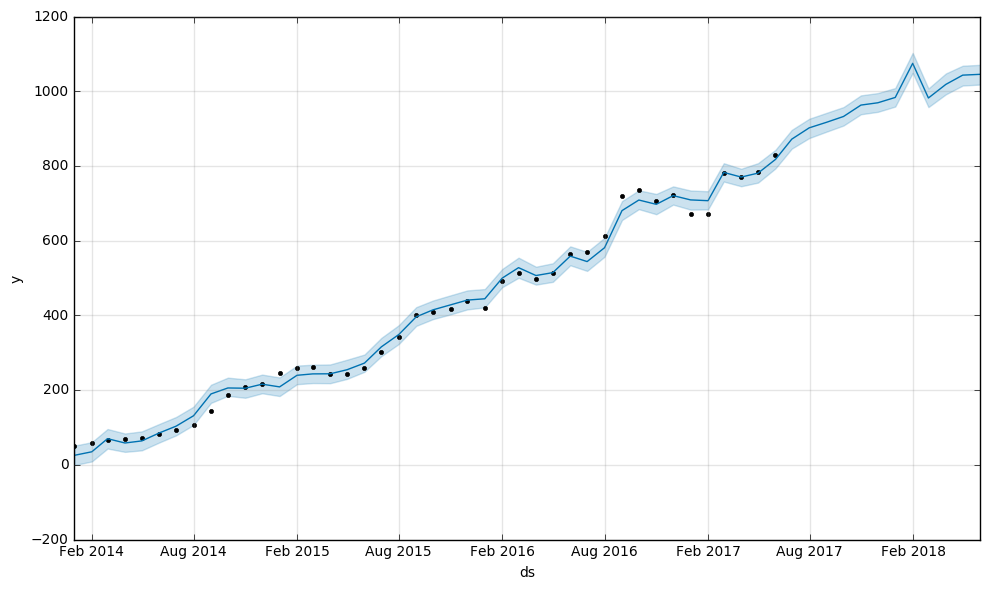

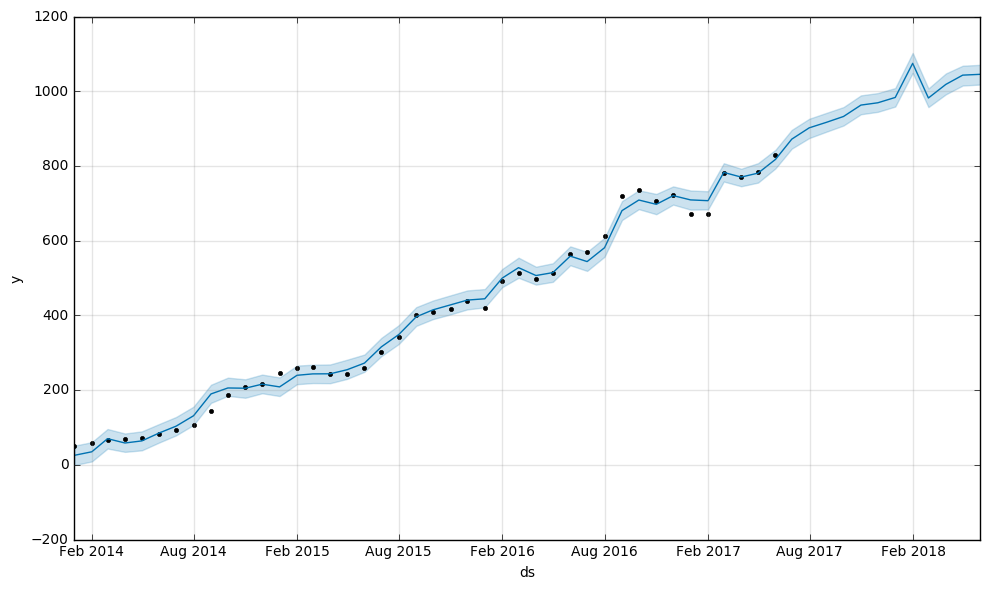

In [8]:
m = Prophet(weekly_seasonality = False, yearly_seasonality = True)

m.fit(temp_df)
future = m.make_future_dataframe(periods = forecast_period,
                                 freq='m')
forecast = m.predict(future)
m.plot(forecast)
#m.plot_components(forecast)

In [50]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv(output_path)

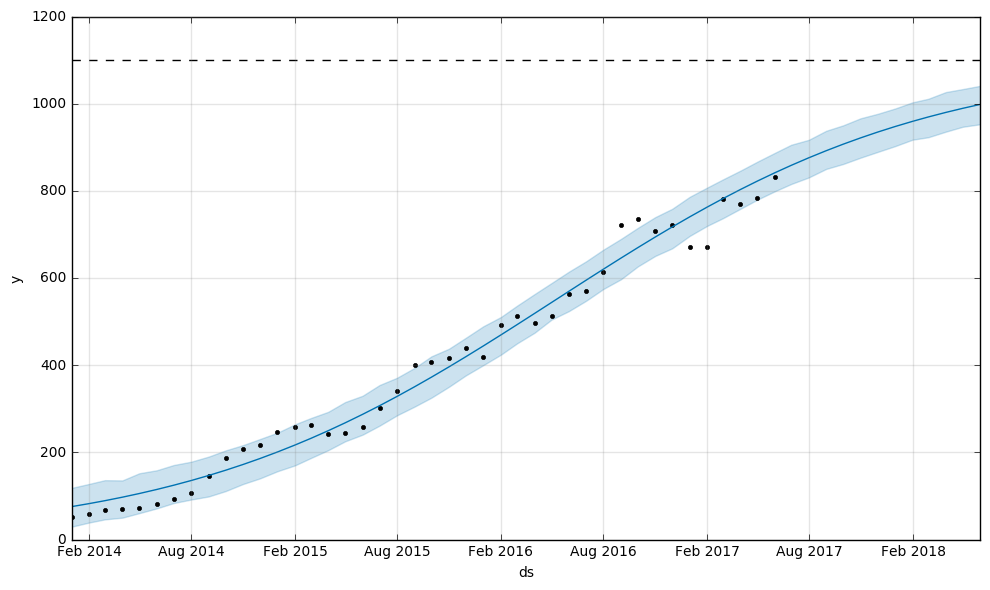

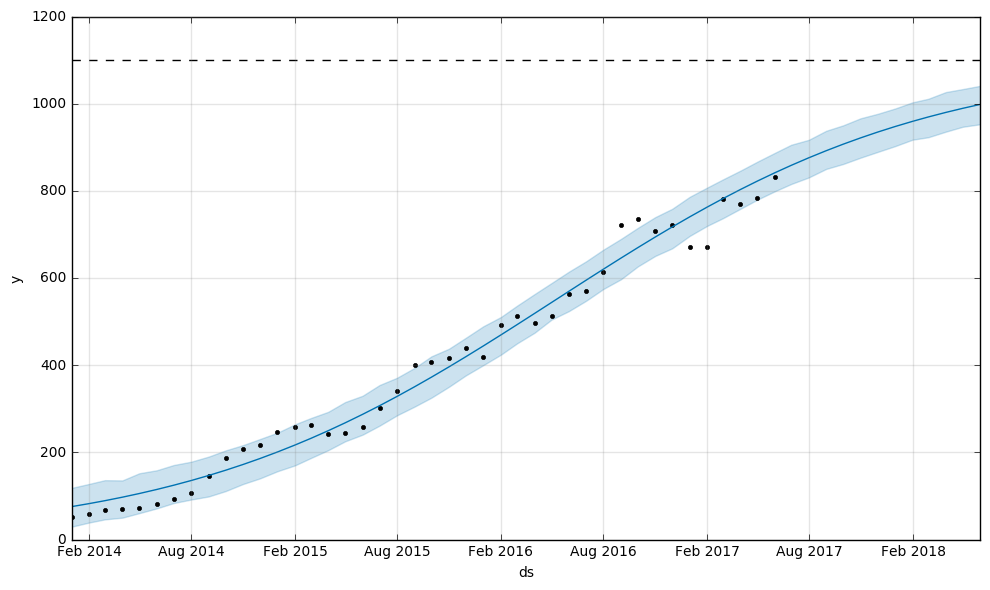

In [17]:
m = Prophet(growth='logistic', weekly_seasonality = False, yearly_seasonality = False)
cap = 1100

temp_df['cap'] = cap
m.fit(temp_df)

future = m.make_future_dataframe(periods = forecast_period, freq = 'M')
future['cap'] = cap
forecast = m.predict(future)

m.plot(forecast)
#m.plot_components(forecast)

In [43]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]#.to_csv(output_path)

,ds,yhat,yhat_lower,yhat_upper
0,2014-01-01,55.321703,28.395010,79.435555
1,2014-02-01,57.697581,32.258178,83.017116
2,2014-03-01,88.630685,63.500543,111.851535
3,2014-04-01,76.032175,49.728801,100.342808
4,2014-05-01,78.258652,53.280402,102.051127
5,2014-06-01,97.179233,73.308807,121.489052
6,2014-07-01,112.607494,88.919688,135.081478
7,2014-08-01,138.206972,113.087123,162.682695
8,2014-09-01,192.630721,168.506158,217.420667
9,2014-10-01,204.692998,178.188775,228.502430
